In [1]:
import parse as p
import author_network as an
import text_mining as tm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
p.parse_json('../data/nips2019.json')

# 1. tf-idf
### Learn and make tf-idf matrix

In [11]:
nltk.download("stopwords")
X = tm.get_title_abstracts()
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(X) # learn words
sorted(tfidf.vocabulary_.items()) # sort word libary
tfidf_matrix = tfidf.fit_transform(X)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junhee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
tfidf_dict = tfidf.get_feature_names()

In [13]:
data_array = tfidf_matrix.toarray()
data = pd.DataFrame(data_array, columns=tfidf_dict)
data.shape

(1427, 10310)

### tf-idf matrix

In [14]:
data # too big...

000   01  015   04   05   06   07  08x   09   0x  ...  zs3net  zsl   σ2  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...  ...  ...   
1422  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.0  0.0   
1423  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.0  0.0   
1424  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.0  0.0   
1425  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.0  0.0   
1426  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...     0.0  0.0  0.0   

      ﬁnal  ﬁnd  ﬁnite  ﬁrst   ﬁt  ﬁtted  ﬂat  
0      0.0  0.0    0.0   0.0  0.0    0.0  0.0  
1      0.0  0.0    0.0   0.0  0.0    0.0  0.0  
2      0.0  0.0    0.0   0.0  0.0    0.0  0.0  
3      0.0  0.0    0.0   0.0  0.0    0.0  0.0  
4      0.0  0.0    0.0   0.0  0.0    0.0  0.0  
...    ...  ...    ...   ...  ...    ...  ...  
1422   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
1423   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
1424   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
1425   0.0  0.0    0.0   0.0  0.0    0.0  0.0  
1426   0.0  0.0    0.0   0.0  0.0    0.0  0.0  

[1427 rows x 10310 columns]

### Top 5 scoring words for each paper

In [24]:
pd.DataFrame(data.columns.values[np.argsort(-data.values, axis=1)[:, :5]], 
                  index=data.index,
                  columns = ['1st Max','2nd Max','3rd Max', '4th Max', '5th Max']).reset_index()

index     1st Max        2nd Max         3rd Max     4th Max  \
0         0  multimodal           meta           mmaml        maml   
1         1    language         vision          visual     vilbert   
2         2         sse     embeddings  regularization   embedding   
3         3         ego      monocular          motion       scale   
4         4      unseen        classes            seen  datapoints   
...     ...         ...            ...             ...         ...   
1422   1422    surround     modulation          visual      cortex   
1423   1423       event     functional            time        self   
1424   1424     hashing  densification     permutation        bcws   
1425   1425        saes        spiking              hp  validation   
1426   1426     softmax        mixtape      bottleneck          5x   

             5th Max  
0              tasks  
1              tasks  
2     stochastically  
3              video  
4         generating  
...              ...  
1422   convolutional  
1423       attention  
1424         jaccard  
1425        activity  
1426             mos  

[1427 rows x 6 columns]

In [25]:
n = 1423
print(X[n])

Self-attention with Functional Time Representation Learning
Sequential modelling with self-attention has achieved cutting edge performances 
in natural language processing. With advantages in model flexibility, computation complexity and interpretability, self-attention is gradually becoming a key component in event sequence models. However, like most other sequence models, self-attention does not account for the time span between events and thus captures sequential signals rather than temporal patterns. 
Without relying on recurrent network structures, self-attention recognizes event orderings via positional encoding. To bridge the gap between modelling time-independent and time-dependent event sequence, we introduce a functional feature map that embeds time span into high-dimensional spaces. By constructing the associated translation-invariant time kernel function, we reveal the functional forms of the feature map under classic functional function analysis results, namely Bochner's T

(1427, 10164)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10164 samples in 1.424s...
[t-SNE] Computed neighbors for 10164 samples in 187.057s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10164
[t-SNE] Computed conditional probabilities for sample 2000 / 10164
[t-SNE] Computed conditional probabilities for sample 3000 / 10164
[t-SNE] Computed conditional probabilities for sample 4000 / 10164
[t-SNE] Computed conditional probabilities for sample 5000 / 10164
[t-SNE] Computed conditional probabilities for sample 6000 / 10164
[t-SNE] Computed conditional probabilities for sample 7000 / 10164
[t-SNE] Computed conditional probabilities for sample 8000 / 10164
[t-SNE] Computed conditional probabilities for sample 9000 / 10164
[t-SNE] Computed conditional probabilities for sample 10000 / 10164
[t-SNE] Computed conditional probabilities for sample 10164 / 10164
[t-SNE] Mean sigma: 0.074937
[t-SNE] KL divergence after 250 iterations with early exaggeration: 103.606934
[t-SNE] 

[[  71.663025  139.72414 ]
 [ -32.861652   51.82265 ]
 [-133.22922   108.258766]
 [ 119.569954   33.067253]
 [  11.770955  -47.71457 ]]
Top words:  10164


(10164, 2)

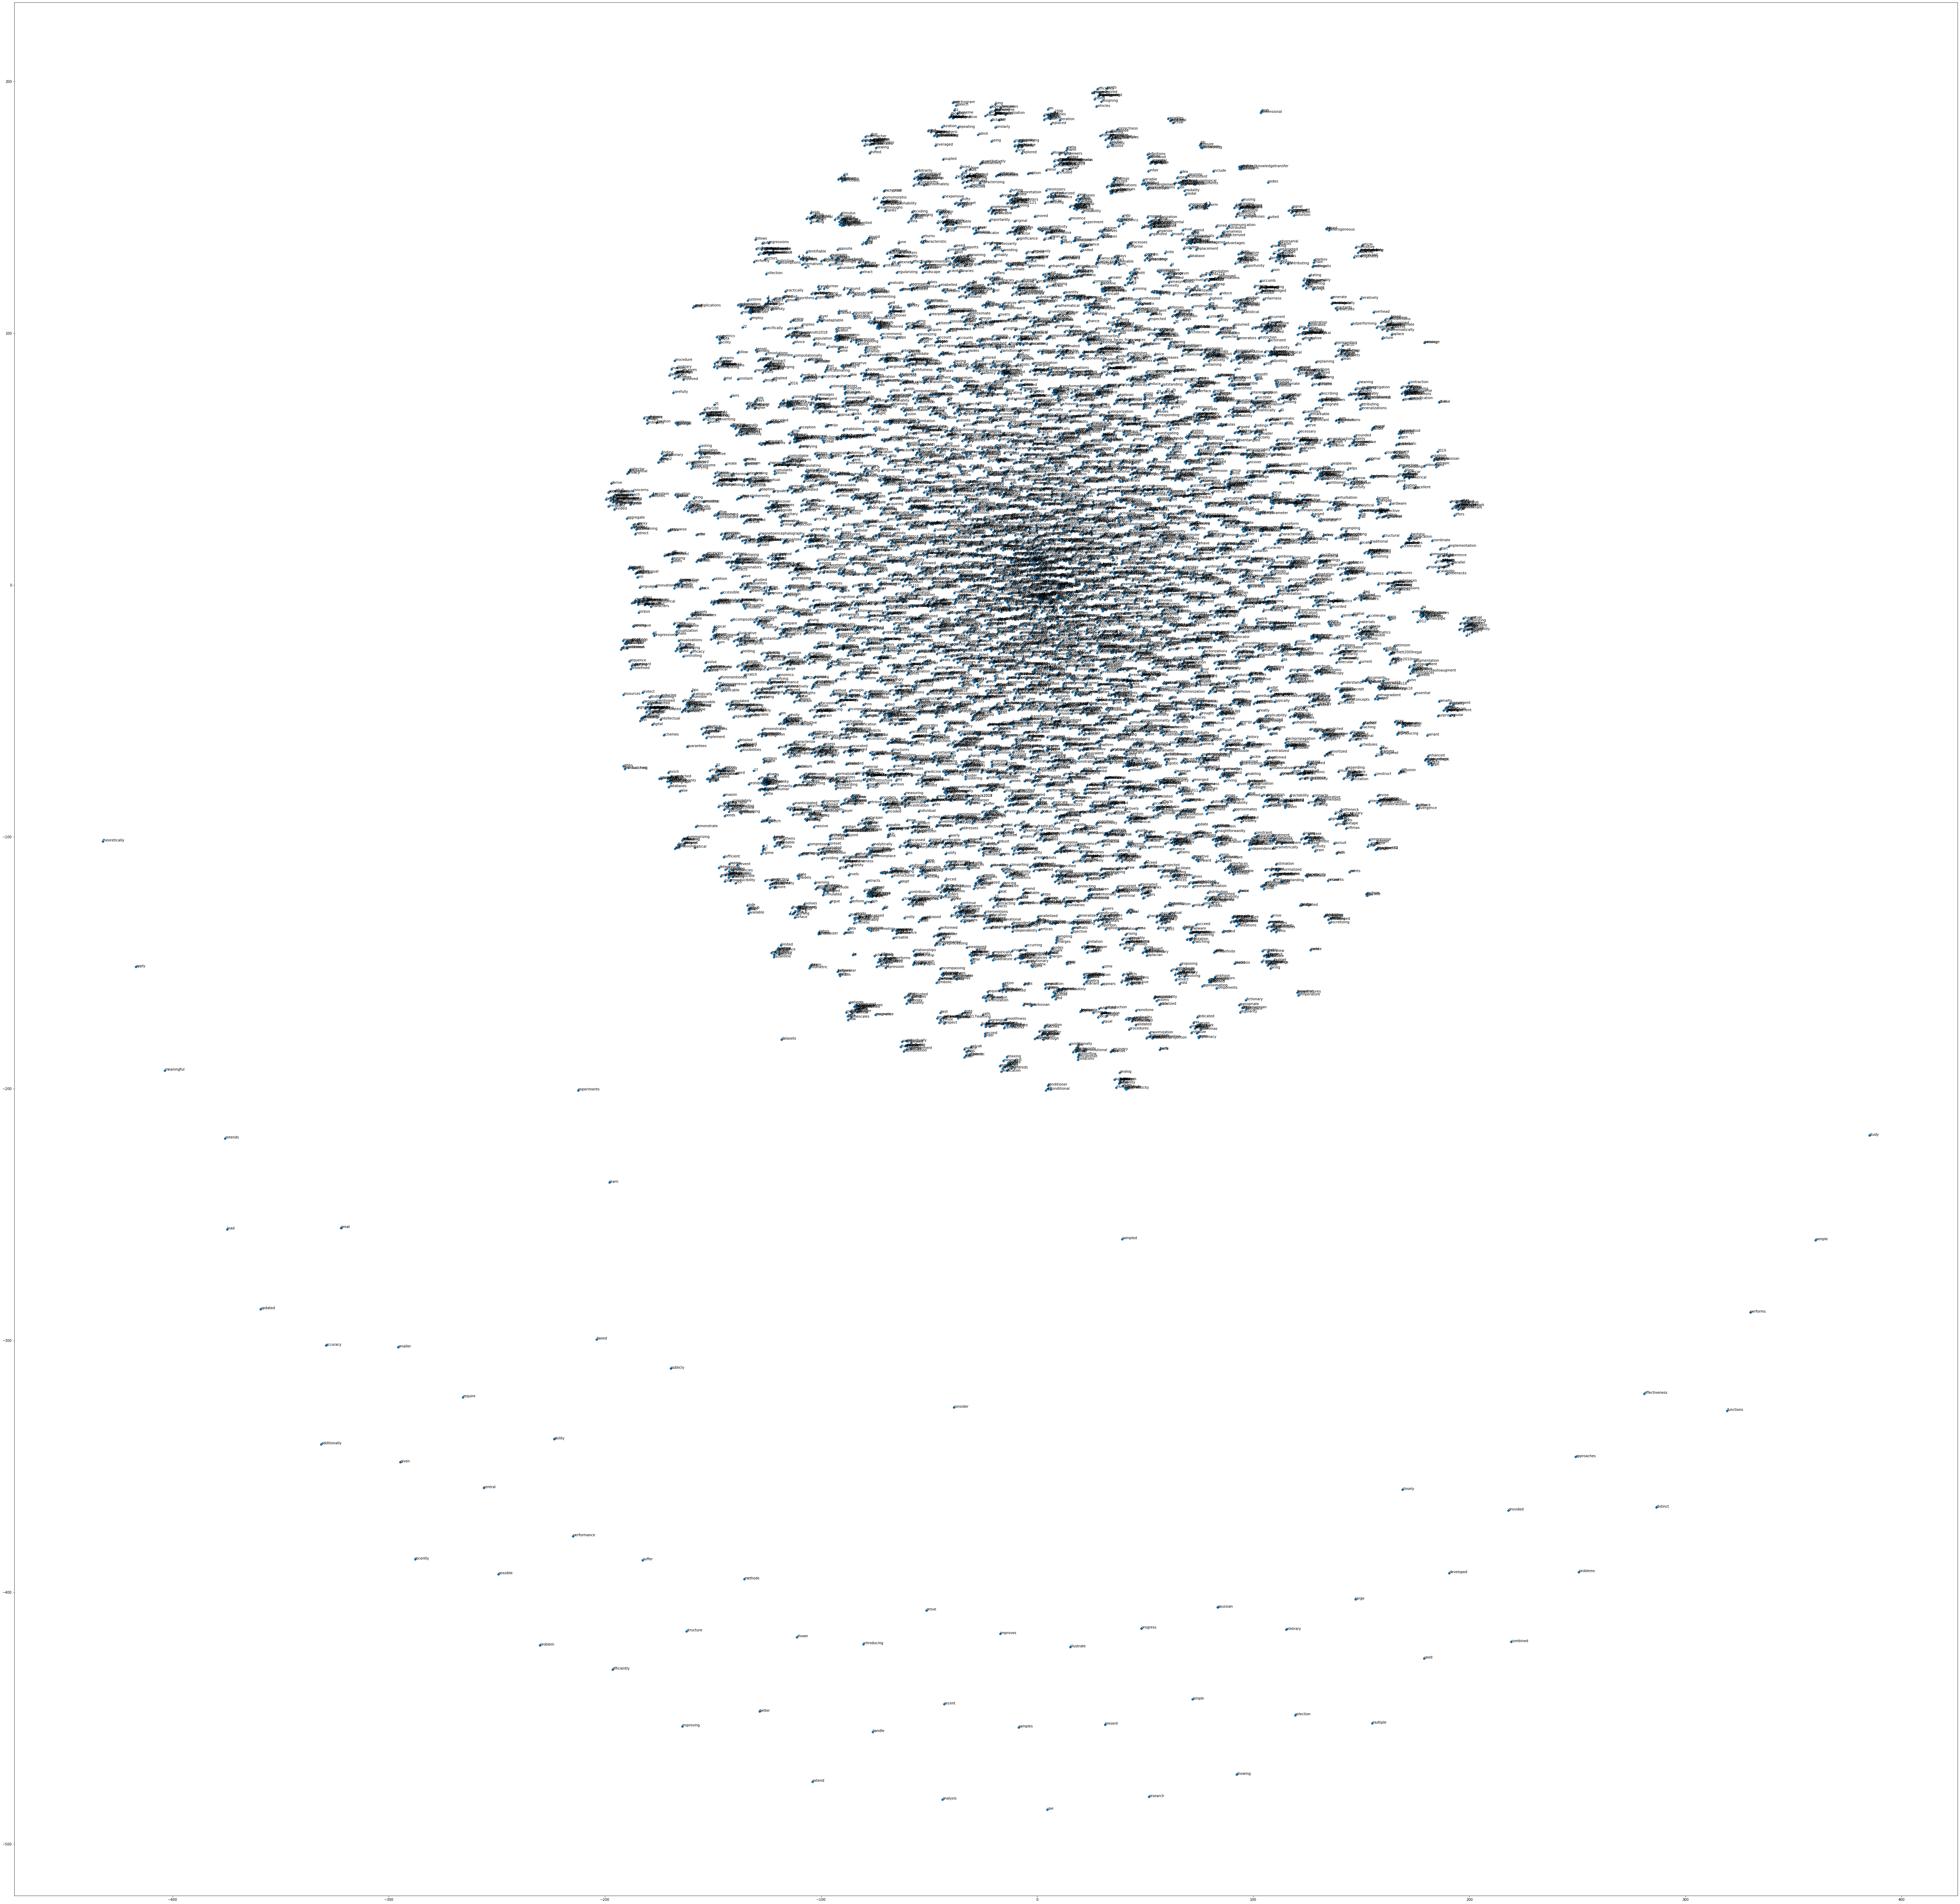